## Phase 4 (Modeling): Logistic Regression

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 10](https://data-science.training/kapitel-10/)
* Datum: 23.03.2023

Versionen 4 und 5

In [4]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# Klassen und Funktionen der scikit-learn Module importieren
#  Maschinelles Lernen, Algorithmen
#  https://scikit-learn.org/stable/modules/classes.html
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
# Pickle Paket (Package) importieren
#  Objekte serialisieren
#  https://docs.python.org/3/library/pickle.html
import pickle as pk
# Eigene Module importieren
#  zur Bewertung der Modelle
import sys
sys.path.append('../00_DST_Module/')
import dst_score_functions as sf
# Warnungen unterdrücken
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Datenversion festlegen: 4, 5
version  = 5
# Modell-Abkürzung festlegen: lr = Logistic Regression
shortcut = 'lr'

In [6]:
# Trainingsdaten als Pandas Data Frame (df) aus Excel-Datei laden
#  (KNIME: "Excel Reader")
filename = '../../data/titanic/new/training_v' + str(version) + '.xlsx'
df_train = pd.read_excel(filename)

In [7]:
# Beschreibende Attribute extrahieren (ohne Survived)
X = df_train.iloc[:,1:].values
# Klassenattribut (Survived) extrahieren
y = df_train.iloc[:,0].values

In [8]:
# Stratifizierte k-fache Kreuzvalidierung (mit k=10)
#  (KNIME: "X-Partitioner")
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [9]:
# Parameterstudie
n = 0
best_parameters = None
max_acc = 0
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for solver in solver_list:
    n = n + 1
    print('.', end='')
    model = LogisticRegression(solver=solver, random_state=0)
    acc = 100.0 * cross_val_score(model, X, y, cv=skf).mean()
    if acc > max_acc:
        max_acc = acc
        best_parameters = model.get_params()
        print(' %8.4f ' % acc, end='')
print()
print('Ergebnis')
print(' Anzahl Parameterkombinationen:', n)
print(' Maximale Genauigkeit:', max_acc)
print(' Parameter des besten Modells:')
print(best_parameters)

.  83.0487 ....
Ergebnis
 Anzahl Parameterkombinationen: 5
 Maximale Genauigkeit: 83.04868913857678
 Parameter des besten Modells:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [10]:
# Logistic Regression Methode auswählen
#  (KNIME: "XYZ Learner")
model = LogisticRegression()
model.set_params(**best_parameters)
print(model.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [11]:
# Ergebnisse berechnen und ausgeben
#  (KNIME: "XYZ Learner", "XYZ Predictor", "X-Aggregator", "Scorer")
scores = sf.dst_scores(model, X, y, cv=skf)
sf.dst_print_scores(scores)


Confusion Matrix

* TN (True  Negatives) : 483
* TP (True  Positives) : 257
* FN (False Negatives) : 85
* FP (False Positives) : 66

Gütemaße

* Genauigkeit  (Accuracy)    :   83,05 %
* Spezifität   (Specificity) :   87,97 %
* Sensitivität (Sensitivity) :   75,11 %
* Präzision    (Precision)   :   79,58 %
* Recall       (Recall)      :   75,11 %
* F-Maß        (F Score)     :   77,15 %
* AURC         (AURC)        :   86,81 %
* LogLoss      (LogLoss)     :    0,423

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  81,65 %


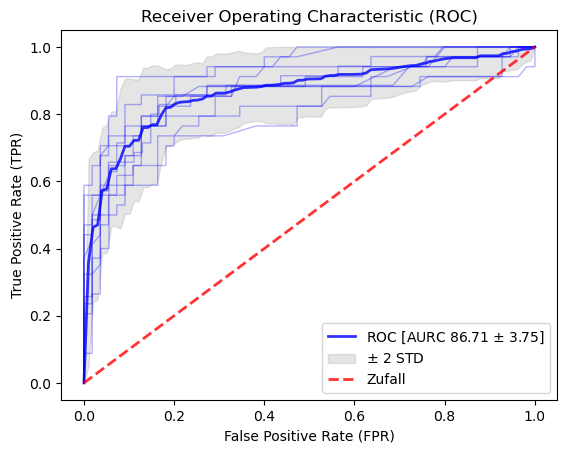

In [12]:
# Receiver Operating Characteristic (ROC) zeichnen
#  (KNIME: "ROC Curve")
sf.dst_roc(model, X, y, cv=skf)

In [13]:
# Modell mit allen Daten trainieren
#  (KNIME: "XYZ Learner")
model.fit(X, y)

LogisticRegression(random_state=0, solver='newton-cg')

In [14]:
# Trainiertes Modell speichern
#  (KNIME: "PMML Writer")
filename = '../../models/titanic/new/' + shortcut + '_v' + str(version)
pk.dump(model, open(filename, 'wb'))

## Ergebnisse

#### Version 4 (Boolean bzw. Int)

Solver = newton-cg

Confusion Matrix

* TN (True  Negatives) : 485
* TP (True  Positives) : 250
* FN (False Negatives) : 92
* FP (False Positives) : 64

Gütemaße

* Genauigkeit  (Accuracy)    :   82,49 %
* Spezifität   (Specificity) :   88,33 %
* Sensitivität (Sensitivity) :   73,06 %
* Präzision    (Precision)   :   80,11 %
* Recall       (Recall)      :   73,06 %
* F-Maß        (F Score)     :   76,17 %
* AURC         (AURC)        :   86,83 %
* LogLoss      (LogLoss)     :    0,421

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  81,40 %

#### Version 5 (Float)

Solver = newton-cg

Confusion Matrix

* TN (True  Negatives) : 483
* TP (True  Positives) : 257
* FN (False Negatives) : 85
* FP (False Positives) : 66

Gütemaße

* Genauigkeit  (Accuracy)    :   83,05 %
* Spezifität   (Specificity) :   87,97 %
* Sensitivität (Sensitivity) :   75,11 %
* Präzision    (Precision)   :   79,58 %
* Recall       (Recall)      :   75,11 %
* F-Maß        (F Score)     :   77,15 %
* AURC         (AURC)        :   86,82 %
* LogLoss      (LogLoss)     :    0,423

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  81,65 %